In [23]:
import os
from pydub import AudioSegment

from pathlib import Path
import librosa
import eyed3

In [9]:
def process_and_classify_audio_files(file_directory):
    for filename in os.listdir(file_directory):
        if filename.endswith(".mp3"):
            file_path = os.path.join(file_directory, filename)
            
    return file_path

In [11]:
file_path = process_and_classify_audio_files("../audio_files/")

In [12]:
file_path

'../audio_files/audio_James-Franco-William-Wei.mp3'

In [4]:
def analyze_audio_quality(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    # Load the audio file
    audio = AudioSegment.from_file(file_path)

    # Get basic information
    duration_seconds = len(audio) / 1000.0
    channels = audio.channels
    sample_width = audio.sample_width
    frame_rate = audio.frame_rate

    # Measure loudness (average amplitude)
    loudness = audio.rms

    # Print the analysis results
    print(f"Duration: {duration_seconds:.2f} seconds")
    print(f"Channels: {channels}")
    print(f"Sample Width: {sample_width} bytes")
    print(f"Frame Rate: {frame_rate} Hz")
    print(f"Loudness: {loudness:.2f} dB")

# Example usage
mp3_file_path = "../audio_files/audio_061225_fiction_ford.mp3"  # Replace with the actual path to your MP3 file
analyze_audio_quality(mp3_file_path)


Duration: 714.08 seconds
Channels: 1
Sample Width: 2 bytes
Frame Rate: 44100 Hz
Loudness: 3171.00 dB


In [37]:
def read_mp3_metadata(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    # Load MP3 metadata
    audiofile = eyed3.load(file_path)

    # Print metadata information
    print(f"Title: {audiofile.tag.title}")
    print(f"Artist: {audiofile.tag.artist}")
    print(f"Album: {audiofile.tag.album}")
    print(f"Track Number: {audiofile.tag.track_num}")
    print(f"Year: {audiofile.tag.getBestDate()}")
    print(f"Duration: {audiofile.info.time_secs} seconds")
    return audiofile.tag.title

# Example usage
mp3_file_path = "../audio_files/audio_061225_fiction_ford.mp3"  # Replace with the actual path to your MP3 file
title = read_mp3_metadata(mp3_file_path)

Title: The New Yorker: Richard Ford reads John Cheever
Artist: Richard Ford, Deborah Treisman
Album: Newyorker.com
Track Number: CountAndTotalTuple(count=None, total=None)
Year: None
Duration: 714.69 seconds


In [14]:
data, sampling_rate = librosa.load(mp3_file_path)

/tmp/ipykernel_2073/4243846697.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sampling_rate = librosa.load(mp3_file_path)
/home/kshitij/.local/lib/python3.8/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


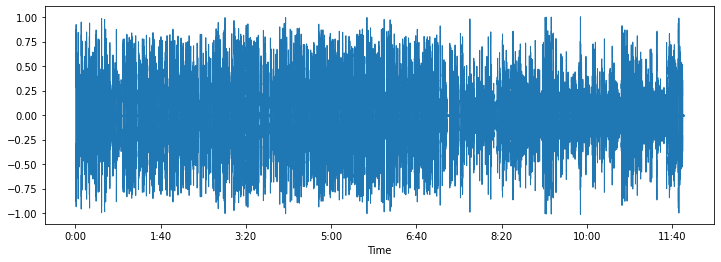

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

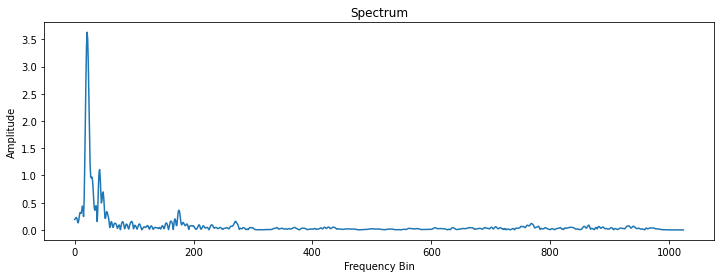

In [17]:
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

In [35]:
def plot_librosa(file_path,title):
    import warnings
    warnings.filterwarnings("ignore")   
    data, sampling_rate = librosa.load(file_path);
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
    
    librosa.display.waveshow(data, sr=sampling_rate,ax=ax[0])
    
    n_fft = 2048
    
    ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
    ax[1].plot(ft);
    ax[1].set_title('Spectrum');
    ax[1].set_xlabel('Frequency Bin');
    ax[1].set_ylabel('Amplitude');
    fig.tight_layout()
    fig.savefig(f"../images/{title}.jpeg",dpi=300)

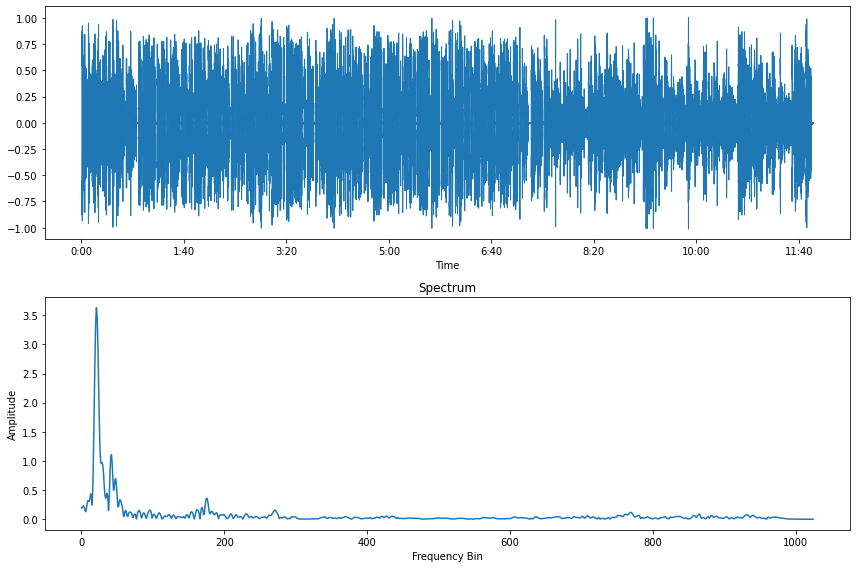

In [36]:
plot_librosa(mp3_file_path);

In [38]:
title = title.lower().strip().replace(" ","_")

In [40]:
title

't'

In [41]:
def plot_librosa(file_path,title):
    import warnings
    warnings.filterwarnings("ignore")   
    
    title = title.lower().strip().replace(" ","_")
    data, sampling_rate = librosa.load(file_path);
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
    
    librosa.display.waveshow(data, sr=sampling_rate,ax=ax[0])
    
    n_fft = 2048
    
    ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
    ax[1].plot(ft);
    ax[1].set_title('Spectrum');
    ax[1].set_xlabel('Frequency Bin');
    ax[1].set_ylabel('Amplitude');
    fig.tight_layout()
    fig.savefig('../images/'+str(title)+'.jpeg',dpi=300)

Title: The New Yorker: Richard Ford reads John Cheever
Artist: Richard Ford, Deborah Treisman
Album: Newyorker.com
Track Number: CountAndTotalTuple(count=None, total=None)
Year: None
Duration: 714.69 seconds
Zero-Crossings Rate Mean: 0.06


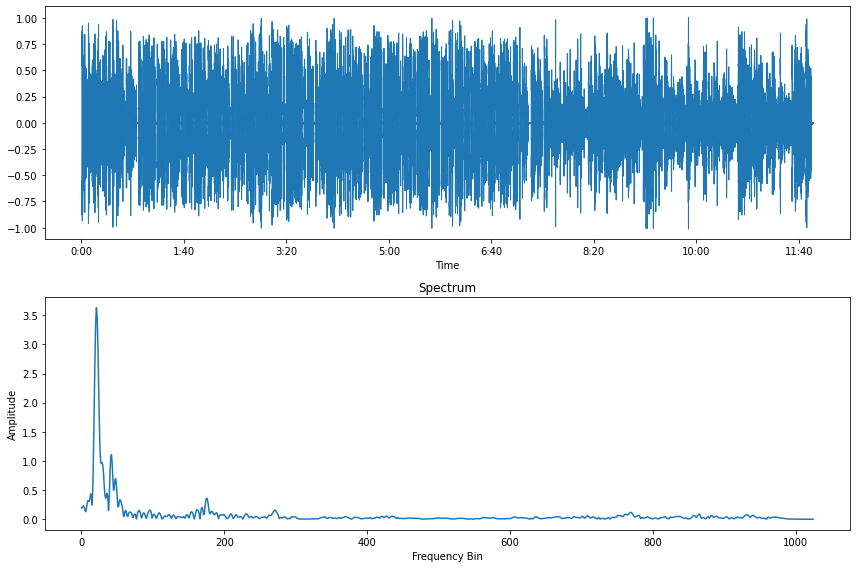

In [42]:
title = read_mp3_metadata(mp3_file_path)
analyze_audio_quality(mp3_file_path)
plot_librosa(mp3_file_path,title)

In [43]:
title

'The New Yorker: Richard Ford reads John Cheever'